In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

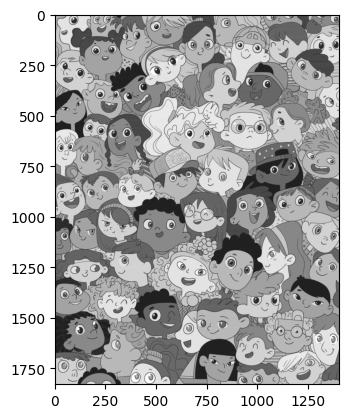

In [10]:
img2 = cv.imread('../Finding/1_target.jpg')
img = cv.imread('../Finding/1_target.jpg', 0)
plt.imshow(img, cmap='gray')

## Visualize the templates

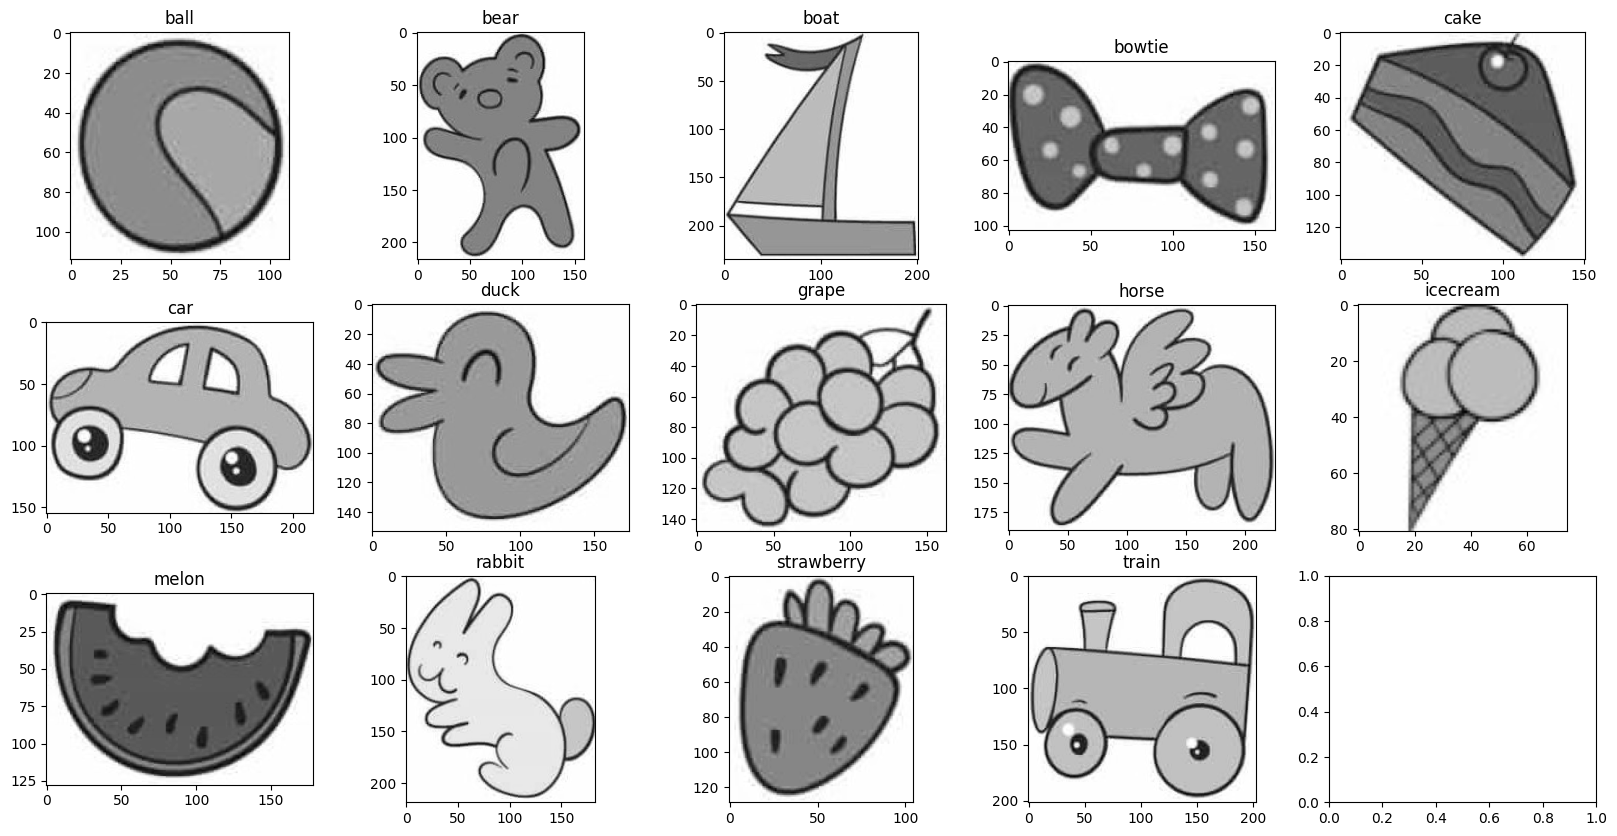

In [11]:
objects = ['ball', 'bear', 'boat', 'bowtie', 'cake', 'car', 'duck', 'grape', 'horse', 'icecream', 'melon', 'rabbit', 'strawberry', 'train']
template_paths = [f'../Finding/1_{object}.jpg' for object in objects]

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

Searching for ball...
Searching for bear...
Searching for boat...
Searching for bowtie...
Searching for cake...
Searching for car...
Searching for duck...
Searching for grape...
Searching for horse...
Searching for icecream...
Searching for melon...
Searching for rabbit...
Searching for strawberry...
Searching for train...


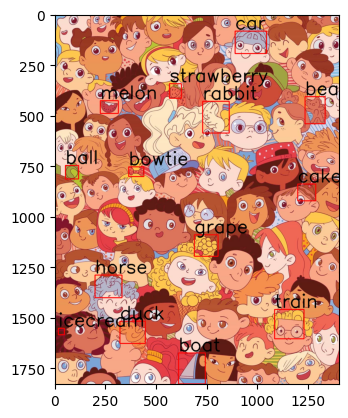

In [12]:
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)

for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)
        _, max_val, _, max_loc = cv.minMaxLoc(result)

        if max_val > best_val:
            best_val = max_val
            best_match = (max_loc, w, h)

    if best_match and best_val >= threshold:
        pt, w, h = best_match
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
        cv.putText(img2, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)

cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()


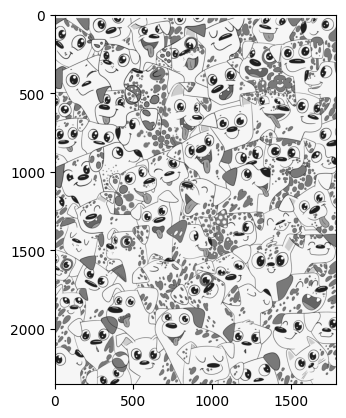

In [13]:
img = cv.imread('../Finding/2.jpg', 0)
img2 = cv.imread('../Finding/2.jpg')
plt.imshow(img, cmap='gray')

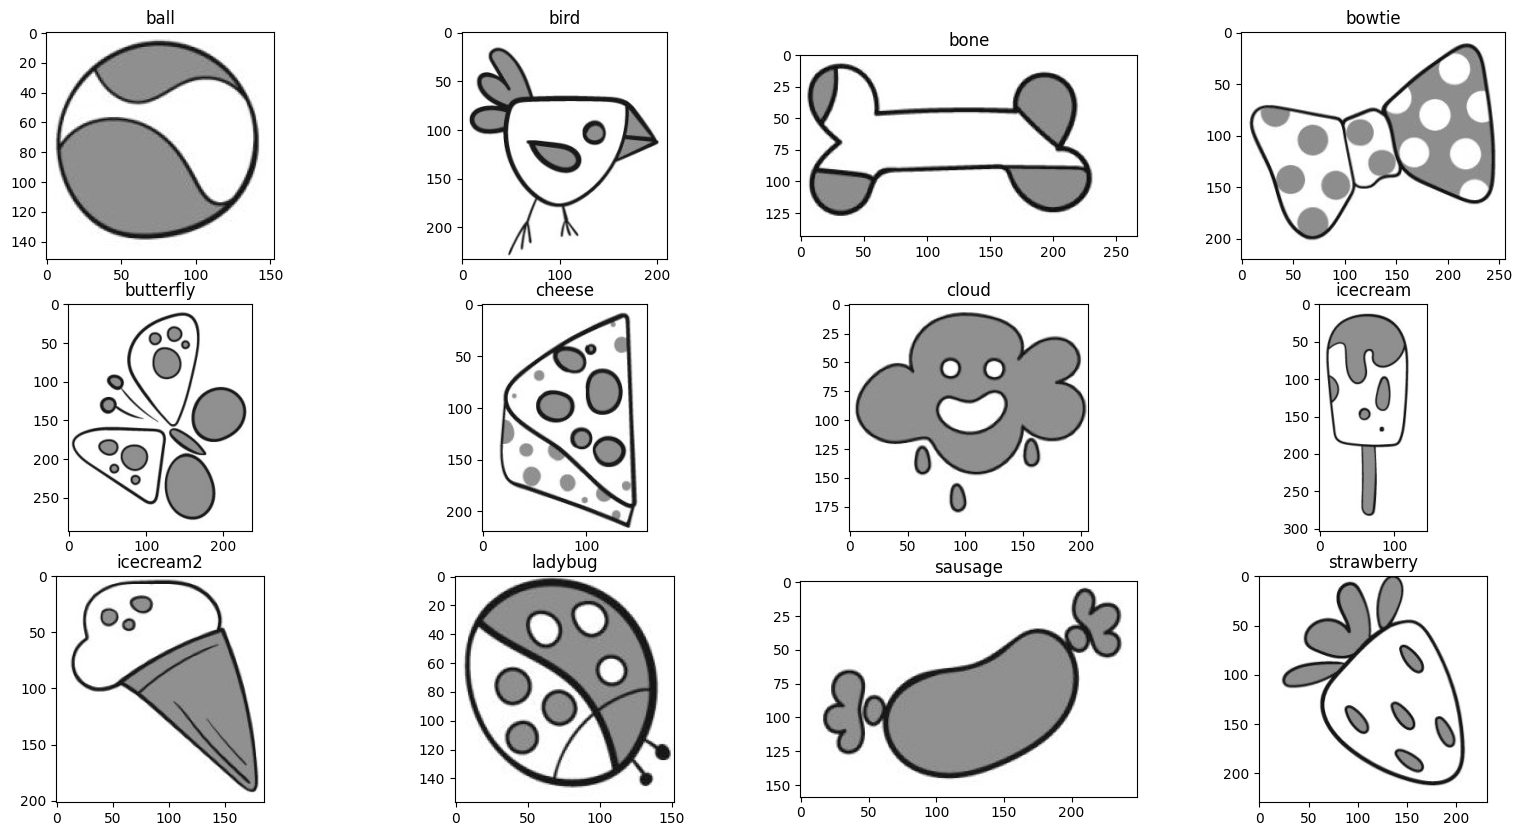

In [14]:
objects = ['ball', 'bird', 'bone', 'bowtie', 'butterfly', 'cheese', 'cloud', 'icecream', 'icecream2', 'ladybug', 'sausage', 'strawberry']
template_paths = [f'../Finding/2_{object}.jpg' for object in objects]

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

Searching for ball...
Searching for bird...
Searching for bone...
Searching for bowtie...
Searching for butterfly...
Searching for cheese...
Searching for cloud...
Searching for icecream...
Searching for icecream2...
Searching for ladybug...
Searching for sausage...
Searching for strawberry...


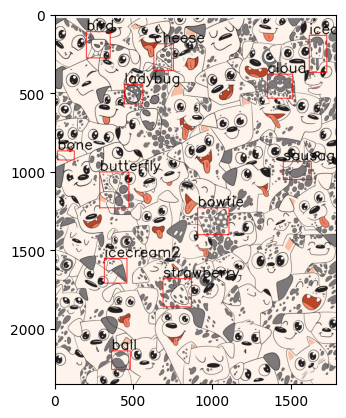

In [15]:
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)

for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)
        _, max_val, _, max_loc = cv.minMaxLoc(result)

        if max_val > best_val:
            best_val = max_val
            best_match = (max_loc, w, h)

    if best_match and best_val >= threshold:
        pt, w, h = best_match
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
        cv.putText(img2, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)

cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()


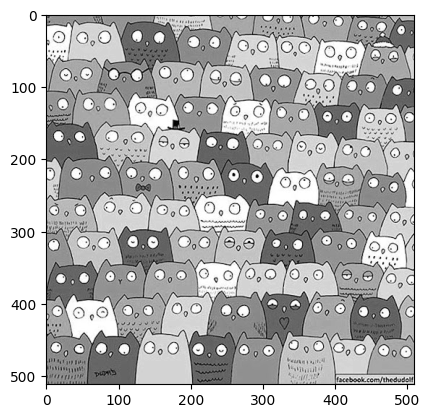

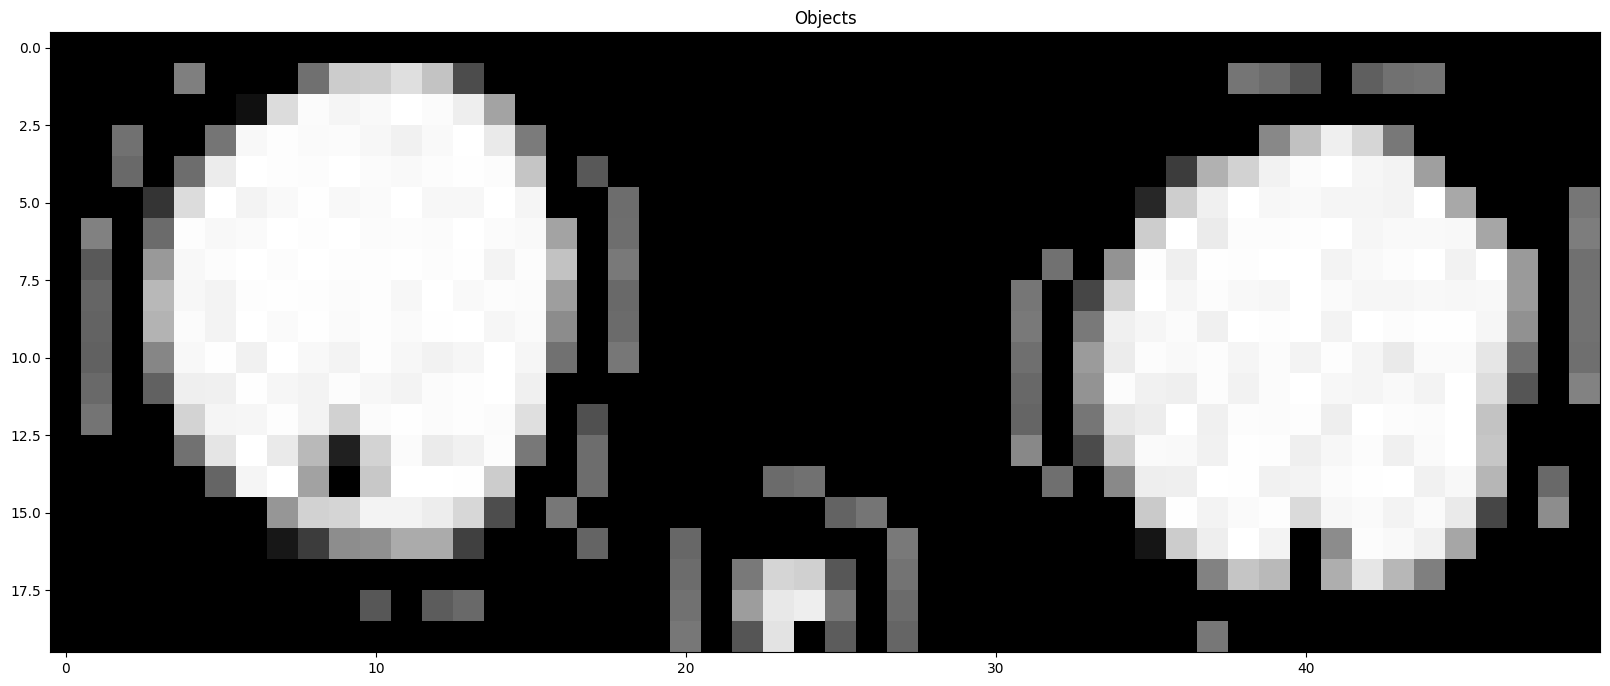

Searching for object...


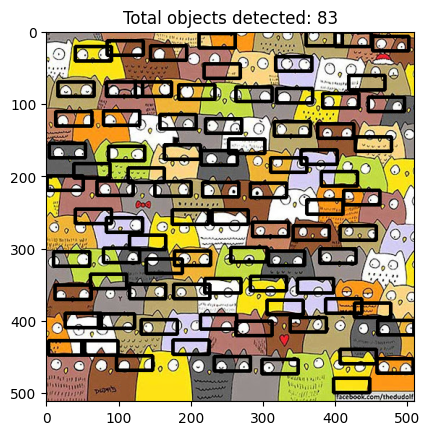

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Hàm chuẩn hóa ảnh bằng cách trừ đi mean và chia cho std
def normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    normalized = (image - mean) / std
    #return image
    return normalized.astype(np.float32)  # Chuyển về kiểu float32
def denormalize(image):
    # Đưa giá trị ảnh về khoảng 0-255
    normalized_img = cv.normalize(image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    return normalized_img.astype(np.uint8)  # Chuyển về kiểu uint8 để hiển thị hoặc lưu ảnh
def process_template_image(template_gray):
    edges = cv.Canny(template_gray, 100, 200)
    mask = np.zeros_like(template_gray)
    mask[edges > 0] = 255
    template_gray[(template_gray <= 200) & (mask == 0)] = 0
    return template_gray    


# Đọc ảnh chính và chuẩn hóa
img2 = cv.imread('../Counting/cat.jpg')
img = cv.imread('../Counting/cat.jpg', 0)
img = normalize(img)  # Chuẩn hóa ảnh chính
plt.imshow(img, cmap='gray')

# Đường dẫn mẫu
template_paths = ['../Counting/cat_template2.jpg']
objects = ['object']

# Hiển thị mẫu và chuẩn hóa mẫu
fig, axes = plt.subplots(figsize=(20, 10))
template = cv.imread(template_paths[0], 0)
template=process_template_image(template)
template = normalize(template)  # Chuẩn hóa mẫu
axes.imshow(template, cmap='gray')
axes.set_title("Objects")
plt.show()

threshold = 0.01
scales = np.linspace(0.4, 2.0, 20)

# Khởi tạo biến để đếm số lượng phát hiện
detected_count = 0
scales=[1]

# Duyệt qua từng mẫu
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    template = normalize(template)  # Chuẩn hóa mẫu

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    matches = []  # Danh sách lưu trữ các phát hiện phù hợp

    for scale in scales:
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        # resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        # resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        # w, h = resized_template.shape[::-1]
        # result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # # Tìm vị trí các điểm phù hợp với ngưỡng
        # _, max_val, _, max_loc = cv.minMaxLoc(result)
        
        # # TM_CCORR_NORMED tìm kiếm điểm phù hợp lớn nhất (max_val càng lớn càng tốt)
        # if max_val >= threshold:
        #     matches.append((max_loc, w, h))
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # Tìm tất cả vị trí đạt ngưỡng phù hợp
        locations = np.where(result >= 0.2)

        # Duyệt qua các vị trí và thêm vào danh sách matches
        for pt in zip(*locations[::-1]):  # Đổi ngược tọa độ vì np.where trả về (y, x)
            matches.append((pt, w, h))

    def distance(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    # Ngưỡng để xác định các ô gần nhau
    min_dist = 40

    # Danh sách lưu các ô đã lọc (đảm bảo không bị trùng lặp quá gần nhau)
    filtered_matches = []

    # Duyệt qua từng ô trong danh sách matches
    for match in matches:
        pt, w, h = match
        is_duplicate = False

        # Kiểm tra với các ô đã có trong filtered_matches
        for filtered_match in filtered_matches:
            filtered_pt, _, _ = filtered_match

            # Nếu khoảng cách giữa hai điểm nhỏ hơn min_dist, thì coi là trùng lặp
            if distance(pt, filtered_pt) < min_dist:
                is_duplicate = True
                break

        # Nếu không phải là trùng lặp, thêm vào danh sách kết quả
        if not is_duplicate:
            filtered_matches.append(match)    


# Lưu và hiển thị ảnh với tổng số đối tượng được phát hiện
img = denormalize(img)  # Đưa ảnh về khoảng 0-255 để vẽ và lưu
# Vẽ các phát hiện trên ảnh
for pt, w, h in filtered_matches:
        detected_count += 1
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), thickness=4)
        #cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)
cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f'Total objects detected: {detected_count}')
plt.show()


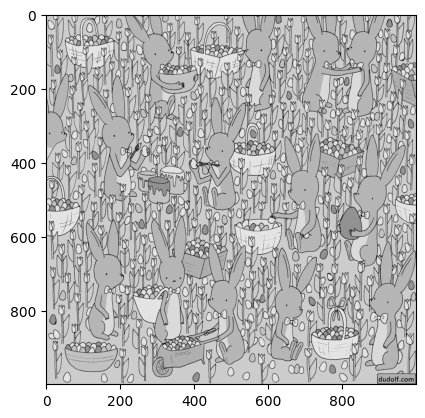

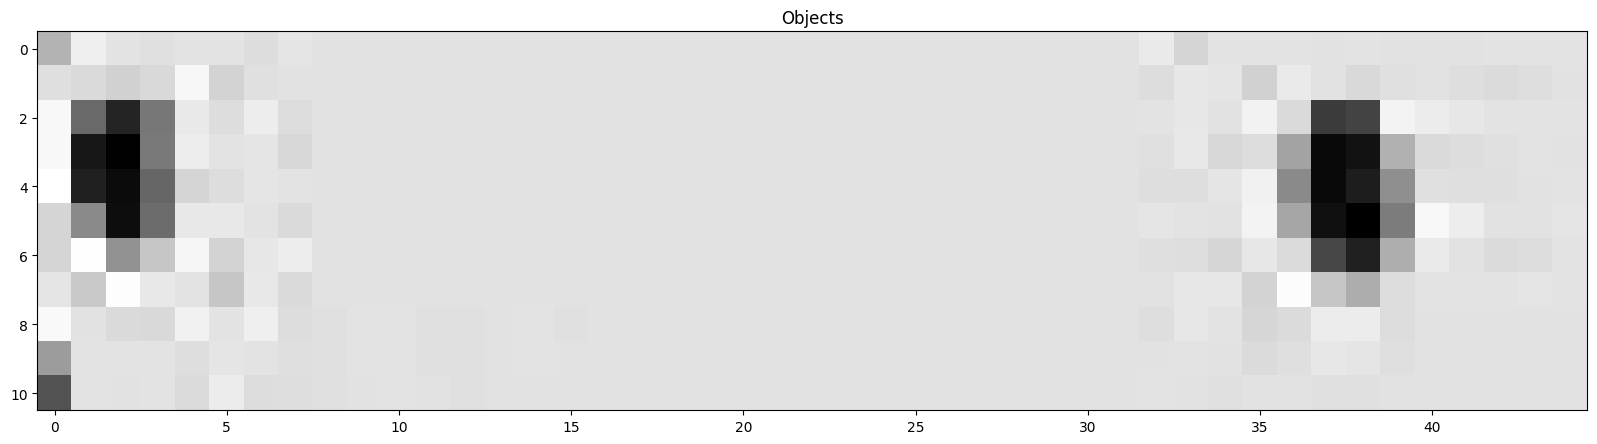

Searching for object...


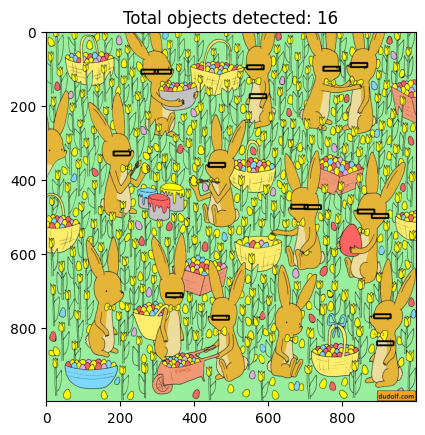

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Hàm chuẩn hóa ảnh bằng cách trừ đi mean và chia cho std
def normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    normalized = (image - mean) / std
    #return image
    return normalized.astype(np.float32)  # Chuyển về kiểu float32
def denormalize(image):
    # Đưa giá trị ảnh về khoảng 0-255
    normalized_img = cv.normalize(image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    return normalized_img.astype(np.uint8)  # Chuyển về kiểu uint8 để hiển thị hoặc lưu ảnh


# Đọc ảnh chính và chuẩn hóa
img2 = cv.imread('../Counting/rabbit.jpeg')
img = cv.imread('../Counting/rabbit.jpeg', 0)
img = normalize(img)  # Chuẩn hóa ảnh chính
plt.imshow(img, cmap='gray')

# Đường dẫn mẫu
template_paths = ['../Counting/rabbit1_template2.jpeg']
objects = ['object']

# Hiển thị mẫu và chuẩn hóa mẫu
fig, axes = plt.subplots(figsize=(20, 10))
template = cv.imread(template_paths[0], 0)
template = normalize(template)  # Chuẩn hóa mẫu
axes.imshow(template, cmap='gray')
axes.set_title("Objects")
plt.show()

threshold = 0.01
scales = np.linspace(0.4, 2.0, 20)

# Khởi tạo biến để đếm số lượng phát hiện
detected_count = 0
scales=[1]

# Duyệt qua từng mẫu
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    template = normalize(template)  # Chuẩn hóa mẫu

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    matches = []  # Danh sách lưu trữ các phát hiện phù hợp

    for scale in scales:
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        # resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        # resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        # w, h = resized_template.shape[::-1]
        # result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # # Tìm vị trí các điểm phù hợp với ngưỡng
        # _, max_val, _, max_loc = cv.minMaxLoc(result)
        
        # # TM_CCORR_NORMED tìm kiếm điểm phù hợp lớn nhất (max_val càng lớn càng tốt)
        # if max_val >= threshold:
        #     matches.append((max_loc, w, h))
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # Tìm tất cả vị trí đạt ngưỡng phù hợp
        locations = np.where(result >= 0.5)

        # Duyệt qua các vị trí và thêm vào danh sách matches
        for pt in zip(*locations[::-1]):  # Đổi ngược tọa độ vì np.where trả về (y, x)
            matches.append((pt, w, h))

    def distance(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    # Ngưỡng để xác định các ô gần nhau
    min_dist = 30

    # Danh sách lưu các ô đã lọc (đảm bảo không bị trùng lặp quá gần nhau)
    filtered_matches = []

    # Duyệt qua từng ô trong danh sách matches
    for match in matches:
        pt, w, h = match
        is_duplicate = False

        # Kiểm tra với các ô đã có trong filtered_matches
        for filtered_match in filtered_matches:
            filtered_pt, _, _ = filtered_match

            # Nếu khoảng cách giữa hai điểm nhỏ hơn min_dist, thì coi là trùng lặp
            if distance(pt, filtered_pt) < min_dist:
                is_duplicate = True
                break

        # Nếu không phải là trùng lặp, thêm vào danh sách kết quả
        if not is_duplicate:
            filtered_matches.append(match)    


# Lưu và hiển thị ảnh với tổng số đối tượng được phát hiện
img = denormalize(img)  # Đưa ảnh về khoảng 0-255 để vẽ và lưu
# Vẽ các phát hiện trên ảnh
for pt, w, h in filtered_matches:
        detected_count += 1
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), thickness=4)
        #cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)
cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f'Total objects detected: {detected_count}')
plt.show()


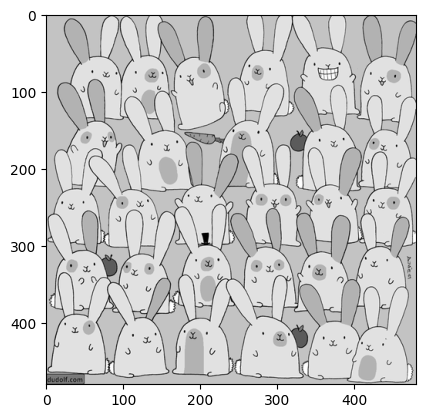

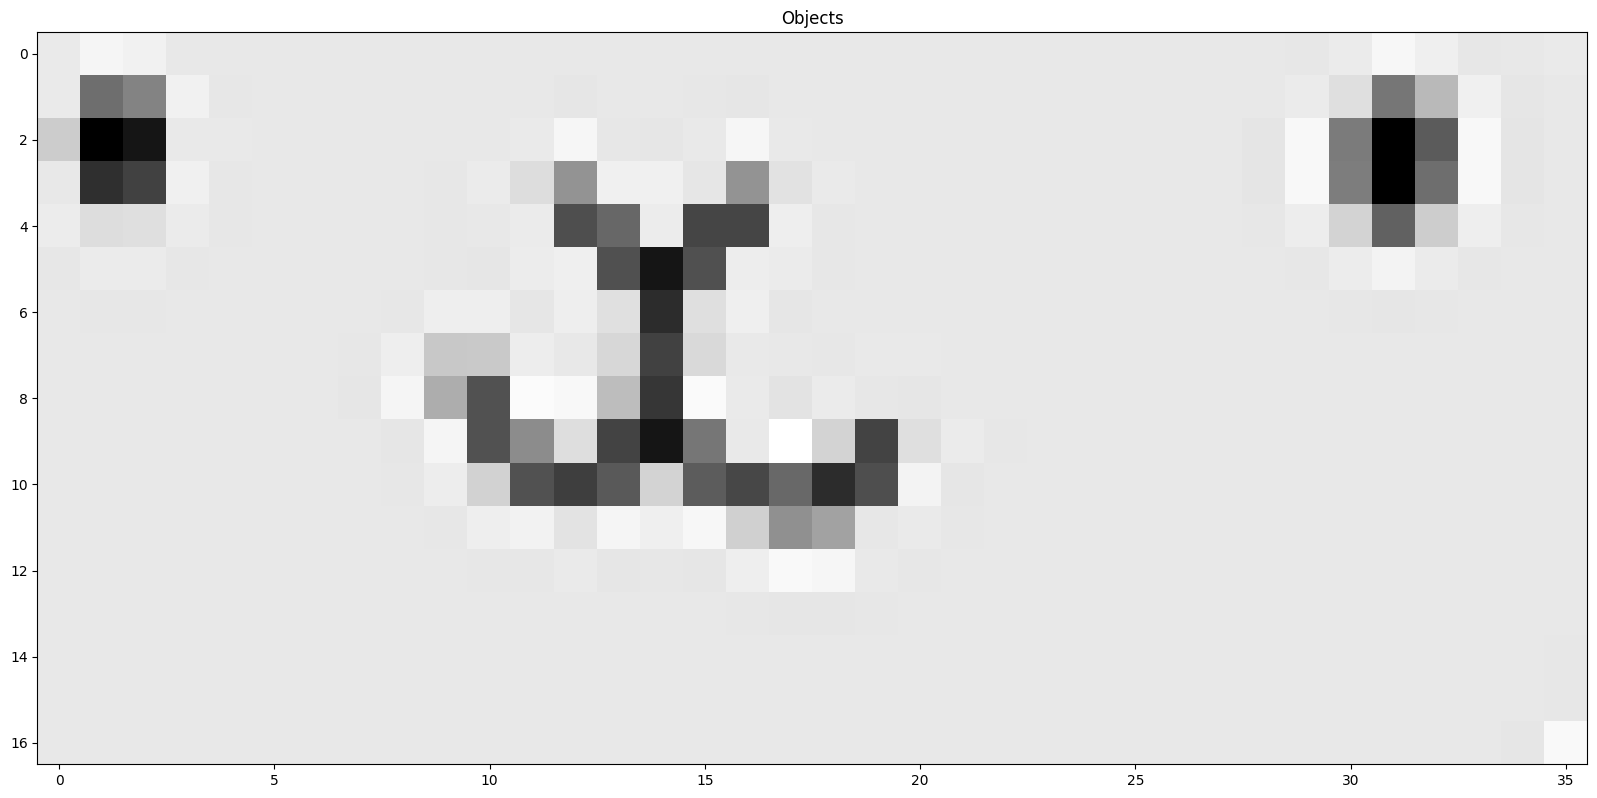

Searching for object...


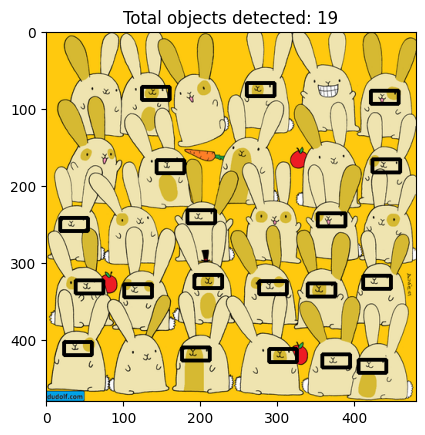

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Hàm chuẩn hóa ảnh bằng cách trừ đi mean và chia cho std
def normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    normalized = (image - mean) / std
    #return image
    return normalized.astype(np.float32)  # Chuyển về kiểu float32
def denormalize(image):
    # Đưa giá trị ảnh về khoảng 0-255
    normalized_img = cv.normalize(image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    return normalized_img.astype(np.uint8)  # Chuyển về kiểu uint8 để hiển thị hoặc lưu ảnh


# Đọc ảnh chính và chuẩn hóa
img2 = cv.imread('../Counting/rabbit2.png')
img = cv.imread('../Counting/rabbit2.png', 0)
img = normalize(img)  # Chuẩn hóa ảnh chính
plt.imshow(img, cmap='gray')

# Đường dẫn mẫu
template_paths = ['../Counting/rabbit2_template2.png']
objects = ['object']

# Hiển thị mẫu và chuẩn hóa mẫu
fig, axes = plt.subplots(figsize=(20, 10))
template = cv.imread(template_paths[0], 0)
template = normalize(template)  # Chuẩn hóa mẫu
axes.imshow(template, cmap='gray')
axes.set_title("Objects")
plt.show()

threshold = 0.01
scales = np.linspace(0.4, 2.0, 20)

# Khởi tạo biến để đếm số lượng phát hiện
detected_count = 0
scales=[1]

# Duyệt qua từng mẫu
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    template = normalize(template)  # Chuẩn hóa mẫu

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    matches = []  # Danh sách lưu trữ các phát hiện phù hợp

    for scale in scales:
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        # resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        # resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        # w, h = resized_template.shape[::-1]
        # result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # # Tìm vị trí các điểm phù hợp với ngưỡng
        # _, max_val, _, max_loc = cv.minMaxLoc(result)
        
        # # TM_CCORR_NORMED tìm kiếm điểm phù hợp lớn nhất (max_val càng lớn càng tốt)
        # if max_val >= threshold:
        #     matches.append((max_loc, w, h))
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # Tìm tất cả vị trí đạt ngưỡng phù hợp
        locations = np.where(result >= 0.4)

        # Duyệt qua các vị trí và thêm vào danh sách matches
        for pt in zip(*locations[::-1]):  # Đổi ngược tọa độ vì np.where trả về (y, x)
            matches.append((pt, w, h))

    def distance(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    # Ngưỡng để xác định các ô gần nhau
    min_dist = 10

    # Danh sách lưu các ô đã lọc (đảm bảo không bị trùng lặp quá gần nhau)
    filtered_matches = []

    # Duyệt qua từng ô trong danh sách matches
    for match in matches:
        pt, w, h = match
        is_duplicate = False

        # Kiểm tra với các ô đã có trong filtered_matches
        for filtered_match in filtered_matches:
            filtered_pt, _, _ = filtered_match

            # Nếu khoảng cách giữa hai điểm nhỏ hơn min_dist, thì coi là trùng lặp
            if distance(pt, filtered_pt) < min_dist:
                is_duplicate = True
                break

        # Nếu không phải là trùng lặp, thêm vào danh sách kết quả
        if not is_duplicate:
            filtered_matches.append(match)    

    

# Lưu và hiển thị ảnh với tổng số đối tượng được phát hiện
img = denormalize(img)  # Đưa ảnh về khoảng 0-255 để vẽ và lưu
# Vẽ các phát hiện trên ảnh
for pt, w, h in filtered_matches:
        detected_count += 1
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), thickness=4)
        #cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)
cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f'Total objects detected: {detected_count}')
plt.show()


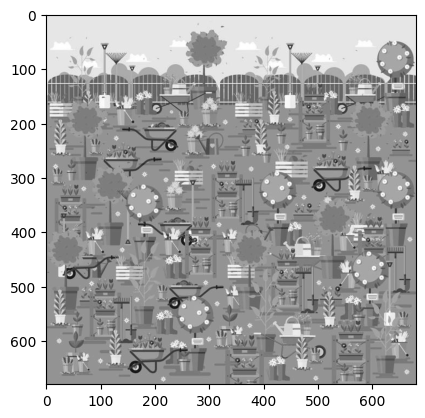

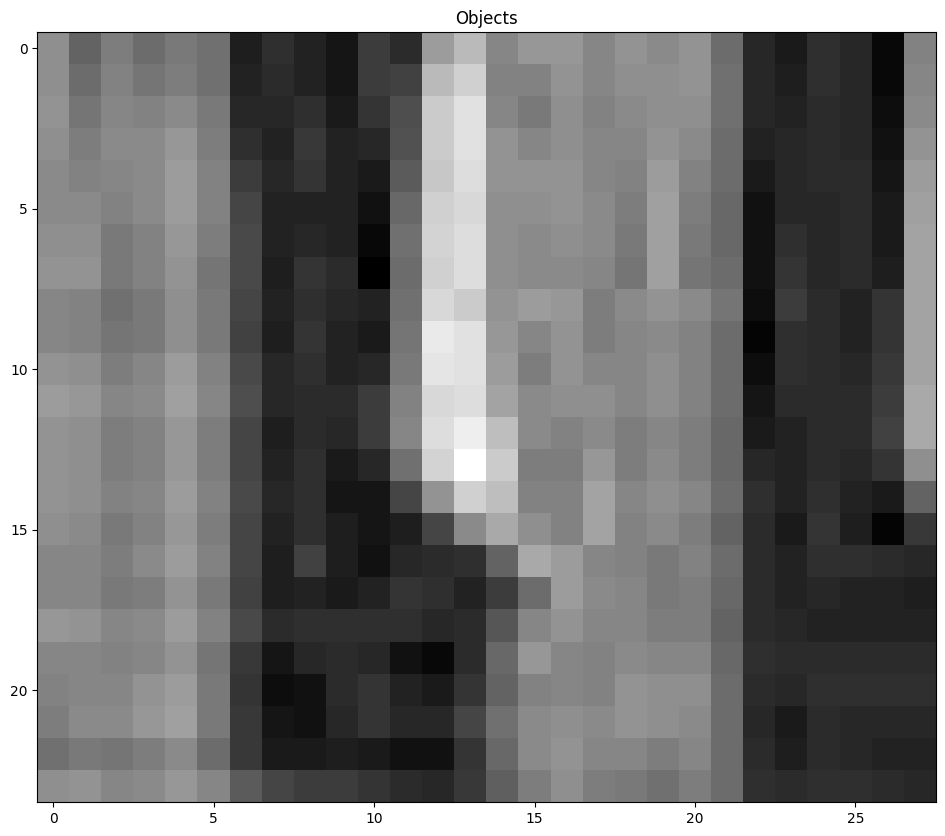

Searching for object...


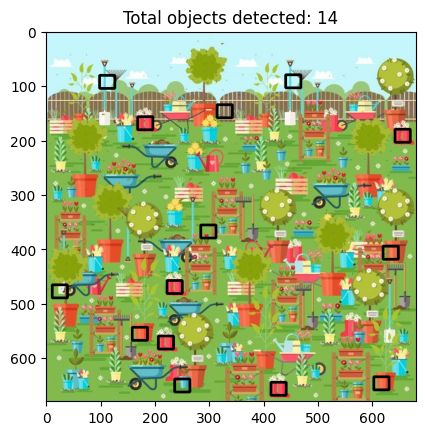

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Hàm chuẩn hóa ảnh bằng cách trừ đi mean và chia cho std
def normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    normalized = (image - mean) / std
    #return image
    return normalized.astype(np.float32)  # Chuyển về kiểu float32
def denormalize(image):
    # Đưa giá trị ảnh về khoảng 0-255
    normalized_img = cv.normalize(image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    return normalized_img.astype(np.uint8)  # Chuyển về kiểu uint8 để hiển thị hoặc lưu ảnh


# Đọc ảnh chính và chuẩn hóa
img2 = cv.imread('../Counting/pair_boot.jpg')
img = cv.imread('../Counting/pair_boot.jpg', 0)
img = normalize(img)  # Chuẩn hóa ảnh chính
plt.imshow(img, cmap='gray')

# Đường dẫn mẫu
template_paths = ['../Counting/pair_boot_template2.jpg']
objects = ['object']

# Hiển thị mẫu và chuẩn hóa mẫu
fig, axes = plt.subplots(figsize=(20, 10))
template = cv.imread(template_paths[0], 0)
template = normalize(template)  # Chuẩn hóa mẫu
axes.imshow(template, cmap='gray')
axes.set_title("Objects")
plt.show()

threshold = 0.01
scales = np.linspace(0.4, 2.0, 20)

# Khởi tạo biến để đếm số lượng phát hiện
detected_count = 0
scales=[1]

# Duyệt qua từng mẫu
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    template = normalize(template)  # Chuẩn hóa mẫu

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    matches = []  # Danh sách lưu trữ các phát hiện phù hợp

    for scale in scales:
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        # resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        # resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        # w, h = resized_template.shape[::-1]
        # result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # # Tìm vị trí các điểm phù hợp với ngưỡng
        # _, max_val, _, max_loc = cv.minMaxLoc(result)
        
        # # TM_CCORR_NORMED tìm kiếm điểm phù hợp lớn nhất (max_val càng lớn càng tốt)
        # if max_val >= threshold:
        #     matches.append((max_loc, w, h))
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCOEFF_NORMED, mask=resized_mask)

        # Tìm tất cả vị trí đạt ngưỡng phù hợp
        locations = np.where(result >= 0.5)

        # Duyệt qua các vị trí và thêm vào danh sách matches
        for pt in zip(*locations[::-1]):  # Đổi ngược tọa độ vì np.where trả về (y, x)
            matches.append((pt, w, h))

    def distance(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    # Ngưỡng để xác định các ô gần nhau
    min_dist = 40

    # Danh sách lưu các ô đã lọc (đảm bảo không bị trùng lặp quá gần nhau)
    filtered_matches = []

    # Duyệt qua từng ô trong danh sách matches
    for match in matches:
        pt, w, h = match
        is_duplicate = False

        # Kiểm tra với các ô đã có trong filtered_matches
        for filtered_match in filtered_matches:
            filtered_pt, _, _ = filtered_match

            # Nếu khoảng cách giữa hai điểm nhỏ hơn min_dist, thì coi là trùng lặp
            if distance(pt, filtered_pt) < min_dist:
                is_duplicate = True
                break

        # Nếu không phải là trùng lặp, thêm vào danh sách kết quả
        if not is_duplicate:
            filtered_matches.append(match)    


# Lưu và hiển thị ảnh với tổng số đối tượng được phát hiện
img = denormalize(img)  # Đưa ảnh về khoảng 0-255 để vẽ và lưu
# Vẽ các phát hiện trên ảnh
for pt, w, h in filtered_matches:
        detected_count += 1
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), thickness=4)
        #cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)
cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f'Total objects detected: {detected_count}')
plt.show()


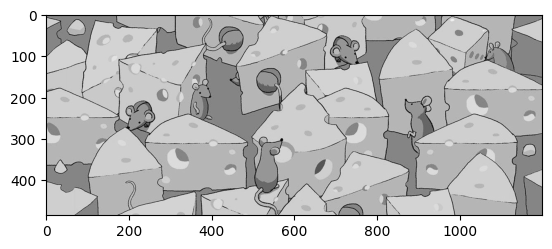

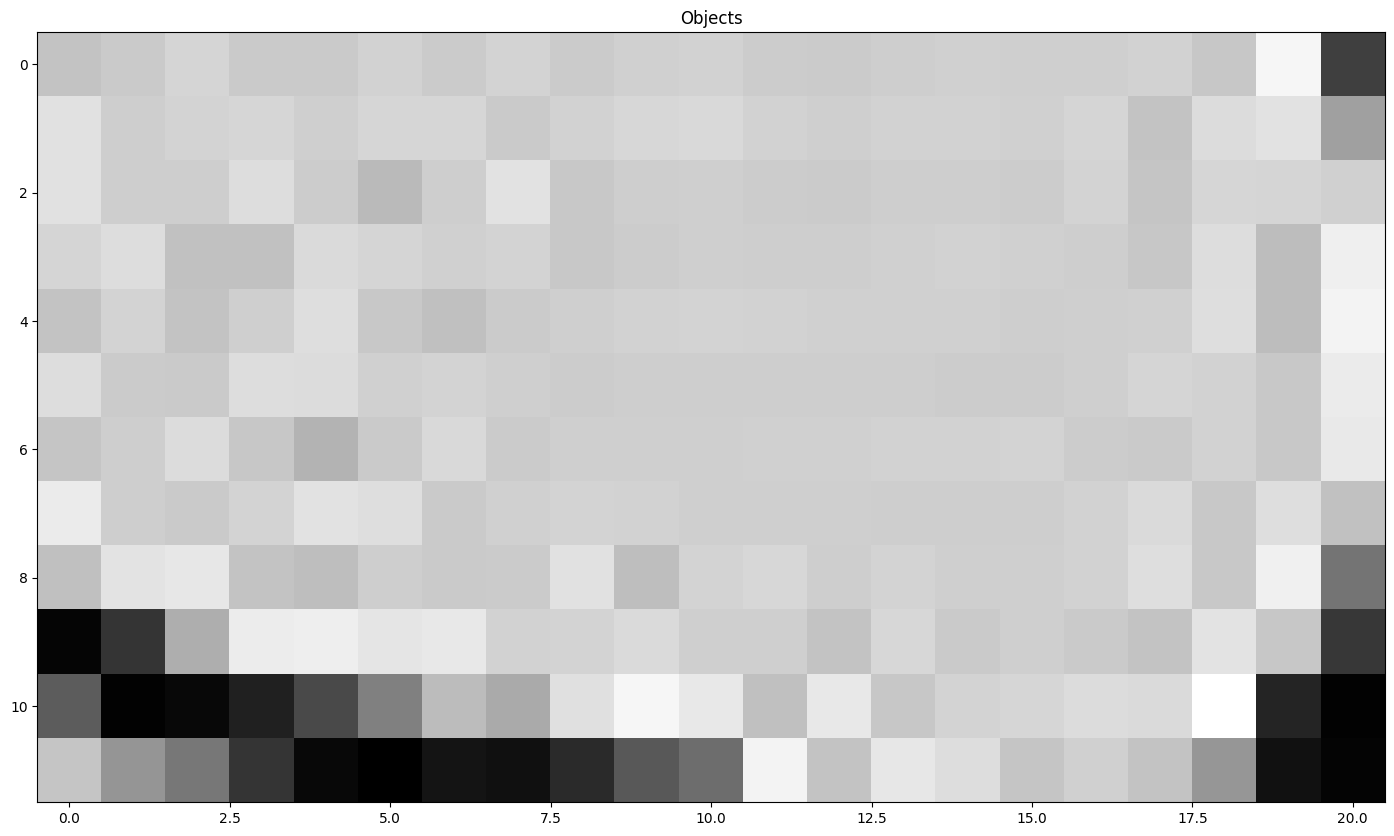

Searching for object...


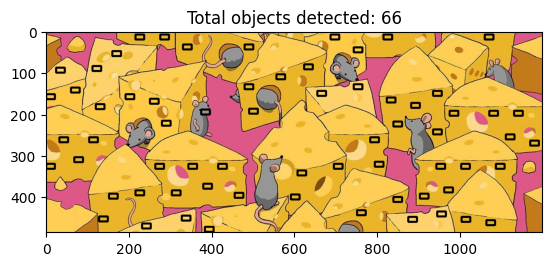

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Hàm chuẩn hóa ảnh bằng cách trừ đi mean và chia cho std
def normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    normalized = (image - mean) / std
    #return image
    return normalized.astype(np.float32)  # Chuyển về kiểu float32
def denormalize(image):
    # Đưa giá trị ảnh về khoảng 0-255
    normalized_img = cv.normalize(image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    return normalized_img.astype(np.uint8)  # Chuyển về kiểu uint8 để hiển thị hoặc lưu ảnh


# Đọc ảnh chính và chuẩn hóa
img2 = cv.imread('../Counting/mouse.jpg')
img = cv.imread('../Counting/mouse.jpg', 0)
img = normalize(img)  # Chuẩn hóa ảnh chính
plt.imshow(img, cmap='gray')

# Đường dẫn mẫu
template_paths = ['../Counting/mouse_template.jpg']
objects = ['object']

# Hiển thị mẫu và chuẩn hóa mẫu
fig, axes = plt.subplots(figsize=(20, 10))
template = cv.imread(template_paths[0], 0)
template = normalize(template)  # Chuẩn hóa mẫu
axes.imshow(template, cmap='gray')
axes.set_title("Objects")
plt.show()

threshold = 0.01
scales = np.linspace(0.4, 2.0, 20)

# Khởi tạo biến để đếm số lượng phát hiện
detected_count = 0
scales=[1]

# Duyệt qua từng mẫu
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    template = normalize(template)  # Chuẩn hóa mẫu

    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)

    matches = []  # Danh sách lưu trữ các phát hiện phù hợp

    for scale in scales:
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        # resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        # resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        # w, h = resized_template.shape[::-1]
        # result = cv.matchTemplate(img, resized_template, cv.TM_CCORR_NORMED, mask=resized_mask)

        # # Tìm vị trí các điểm phù hợp với ngưỡng
        # _, max_val, _, max_loc = cv.minMaxLoc(result)
        
        # # TM_CCORR_NORMED tìm kiếm điểm phù hợp lớn nhất (max_val càng lớn càng tốt)
        # if max_val >= threshold:
        #     matches.append((max_loc, w, h))
        # Thay đổi kích thước mẫu và mặt nạ theo scale
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[::-1]
        result = cv.matchTemplate(img, resized_template, cv.TM_CCOEFF_NORMED, mask=resized_mask)

        # Tìm tất cả vị trí đạt ngưỡng phù hợp
        locations = np.where(result >= 0.95)

        # Duyệt qua các vị trí và thêm vào danh sách matches
        for pt in zip(*locations[::-1]):  # Đổi ngược tọa độ vì np.where trả về (y, x)
            matches.append((pt, w, h))

    def distance(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    # Ngưỡng để xác định các ô gần nhau
    min_dist = 60

    # Danh sách lưu các ô đã lọc (đảm bảo không bị trùng lặp quá gần nhau)
    filtered_matches = []

    # Duyệt qua từng ô trong danh sách matches
    for match in matches:
        pt, w, h = match
        is_duplicate = False

        # Kiểm tra với các ô đã có trong filtered_matches
        for filtered_match in filtered_matches:
            filtered_pt, _, _ = filtered_match

            # Nếu khoảng cách giữa hai điểm nhỏ hơn min_dist, thì coi là trùng lặp
            if distance(pt, filtered_pt) < min_dist:
                is_duplicate = True
                break

        # Nếu không phải là trùng lặp, thêm vào danh sách kết quả
        if not is_duplicate:
            filtered_matches.append(match)    


# Lưu và hiển thị ảnh với tổng số đối tượng được phát hiện
img = denormalize(img)  # Đưa ảnh về khoảng 0-255 để vẽ và lưu
# Vẽ các phát hiện trên ảnh
for pt, w, h in filtered_matches:
        detected_count += 1
        cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 0), thickness=4)
        #cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)
cv.imwrite('res.png', img)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f'Total objects detected: {detected_count}')
plt.show()
